In [1]:
# !pip install geopandas


In [2]:
import os
import arcpy
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd


In [3]:
os.chdir("..") # return to the main directory
home_wd = os.getcwd()
home_wd

'c:\\Users\\milan\\OneDrive - MUNI\\VŠ\\PhD\\Zahraniční stáž\\Work\\HeiGIT_notebooks\\analysis\\ai-assisted-osm-mapping-stats'

In [4]:
in_cont = os.path.join(home_wd, r"shp\continents_borders.shp")
in_af = os.path.join(home_wd, r"shp\africa-states-borders.shp")
in_na = os.path.join(home_wd, r"shp\northamerica-states-borders.shp")
in_eu = os.path.join(home_wd, r"shp\europe-states-borders.shp")
in_as = os.path.join(home_wd, r"shp\asia-states-borders.shp")

out_cont = os.path.join(home_wd, r"geojson-continent-states", "")
out_af = os.path.join(home_wd, r"geojson-africa-states", "")
out_na = os.path.join(home_wd, r"geojson-northamerica-states", "")
out_eu = os.path.join(home_wd, r"geojson-europe-states", "")
out_as = os.path.join(home_wd, r"geojson-asia-states", "")


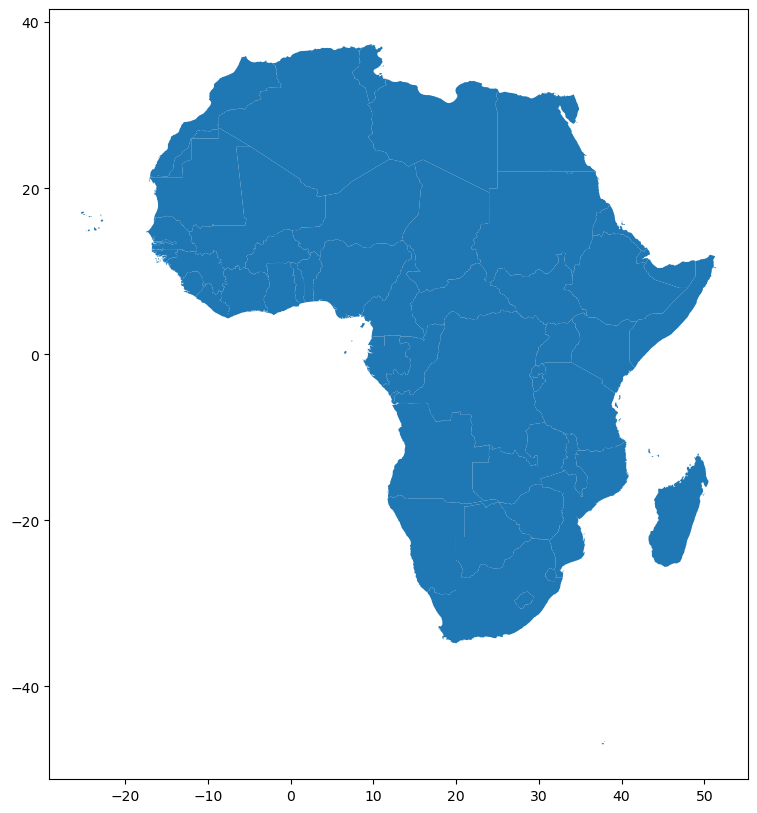

In [5]:
# Load the shapefile using GeoPandas
data = gpd.read_file(in_af)

# Plot the shapefile using GeoPandas
fig, ax = plt.subplots(figsize=(10, 10))
data.plot(ax=ax)
plt.show()


In [6]:
arcpy.Exists(in_af)


True

In [7]:
flds = [str(f.name) for f in arcpy.ListFields(in_af)]
for idx, fld in enumerate(flds):
    print(idx, fld)

0 FID
1 Shape
2 SOVEREIGNT
3 LEVEL
4 TYPE
5 ADMIN
6 NAME
7 CONTINENT
8 NAME_EN


In [8]:
# Use a search cursor to iterate through the rows of the table and create a list of dictionaries

with arcpy.da.SearchCursor(in_af, flds) as cur:
    for row in cur:
        data.append(dict(zip(flds, row)), ignore_index=True)

# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(data)
df


C:\Users\milan\AppData\Local\Temp\ipykernel_19020\3641975643.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data.append(dict(zip(flds, row)), ignore_index=True)
C:\Users\milan\AppData\Roaming\Python\Python39\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
C:\Users\milan\AppData\Local\Temp\ipykernel_19020\3641975643.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data.append(dict(zip(flds, row)), ignore_index=True)
C:\Users\milan\AppData\Roaming\Python\Python39\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
C:\Users\milan\AppData\L

,SOVEREIGNT,LEVEL,TYPE,ADMIN,NAME,CONTINENT,NAME_EN,geometry
0,Ethiopia,2,Sovereign country,Ethiopia,Ethiopia,Africa,Ethiopia,"POLYGON ((34.07070 9.45459, 34.06689 9.53118, ..."
1,South Sudan,2,Sovereign country,South Sudan,S. Sudan,Africa,South Sudan,"POLYGON ((35.92084 4.61933, 35.85654 4.61960, ..."
2,Somalia,2,Sovereign country,Somalia,Somalia,Africa,Somalia,"POLYGON ((46.46696 6.53829, 46.48805 6.55864, ..."
3,Kenya,2,Sovereign country,Kenya,Kenya,Africa,Kenya,"MULTIPOLYGON (((35.70585 4.61945, 35.70594 4.6..."
4,Malawi,2,Sovereign country,Malawi,Malawi,Africa,Malawi,"MULTIPOLYGON (((34.96461 -11.57356, 34.65125 -..."
5,United Republic of Tanzania,2,Sovereign country,United Republic of Tanzania,Tanzania,Africa,Tanzania,"MULTIPOLYGON (((32.92086 -9.40790, 32.90546 -9..."
6,Somaliland,2,Sovereign country,Somaliland,Somaliland,Africa,Somaliland,"POLYGON ((48.93911 11.24913, 48.93911 11.13674..."
7,Morocco,2,Sovereign country,Morocco,Morocco,Africa,Morocco,"POLYGON ((-8.81703 27.66146, -8.81845 27.65940..."
8,Western Sahara,2,Indeterminate,Western Sahara,W. Sahara,Africa,Western Sahara,"POLYGON ((-8.81703 27.66146, -8.81654 27.66147..."
9,Republic of the Congo,2,Sovereign country,Republic of the Congo,Congo,Africa,Republic of the Congo,"POLYGON ((18.62639 3.47687, 18.63455 3.44922, ..."


In [9]:
with arcpy.da.SearchCursor(in_af, flds) as cur:
    for row in cur:
        region_lst = [row[8]]
        id_lst = [row[0]]
        reg_id_dic = {k:v for k,v in zip(region_lst, id_lst)}
        for region in region_lst:
            field = arcpy.AddFieldDelimiters(in_af, "NAME_EN")
            selection = "{field} = '{val}'".format(field=field, val=region)
            selected = arcpy.management.SelectLayerByAttribute(
                in_af, "NEW_SELECTION", selection)
            arcpy.conversion.FeaturesToJSON(selected, f"{out_af}{reg_id_dic[region]}_{region}.geojson", geoJSON=True)
            print(f"{selection} was exported")

"NAME_EN" = 'Ethiopia' was exported
"NAME_EN" = 'South Sudan' was exported
"NAME_EN" = 'Somalia' was exported
"NAME_EN" = 'Kenya' was exported
"NAME_EN" = 'Malawi' was exported
"NAME_EN" = 'Tanzania' was exported
"NAME_EN" = 'Somaliland' was exported
"NAME_EN" = 'Morocco' was exported
"NAME_EN" = 'Western Sahara' was exported
"NAME_EN" = 'Republic of the Congo' was exported
"NAME_EN" = 'Democratic Republic of the Congo' was exported
"NAME_EN" = 'Namibia' was exported
"NAME_EN" = 'South Africa' was exported
"NAME_EN" = 'Libya' was exported
"NAME_EN" = 'Tunisia' was exported
"NAME_EN" = 'Zambia' was exported
"NAME_EN" = 'Sierra Leone' was exported
"NAME_EN" = 'Guinea' was exported
"NAME_EN" = 'Liberia' was exported
"NAME_EN" = 'Central African Republic' was exported
"NAME_EN" = 'Sudan' was exported
"NAME_EN" = 'Djibouti' was exported
"NAME_EN" = 'Eritrea' was exported
"NAME_EN" = 'Ivory Coast' was exported
"NAME_EN" = 'Mali' was exported
"NAME_EN" = 'Senegal' was exported
"NAME_EN" = 'Ni